In [39]:
# import package 
#-*- coding:utf-8 -*-
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd
import chardet

In [150]:
# 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡
file_list = glob('*.txt')
type(file_list)
file_list

['google退出中國市場影響1.txt',
 'google退出中國市場影響10.txt',
 'google退出中國市場影響2.txt',
 'google退出中國市場影響3.txt',
 'google退出中國市場影響4.txt',
 'google退出中國市場影響5.txt',
 'google退出中國市場影響6.txt',
 'google退出中國市場影響7.txt',
 'google退出中國市場影響8.txt',
 'google退出中國市場影響9.txt',
 '中美貿易戰2018-04-04.txt',
 '中美貿易戰加稅18-09-2018.txt',
 '中美貿易戰加稅2018-09-17.txt',
 '中美貿易戰加稅2018-09-18.txt',
 '中美貿易戰加稅2018-09-18。.txt',
 '中美貿易戰加稅2018-09-19.txt',
 '中美貿易戰加稅2018-09-19。.txt',
 '中美貿易戰加稅2018.09.19.txt',
 '中美貿易戰加稅2018年 9月 18日.txt',
 '中美貿易戰加稅2018年9月18日.txt',
 '中美貿易戰加稅2018年9月8日.txt',
 '兩岸經濟1.txt',
 '兩岸經濟10.txt',
 '兩岸經濟2.txt',
 '兩岸經濟3.txt',
 '兩岸經濟4.txt',
 '兩岸經濟5.txt',
 '兩岸經濟6.txt',
 '兩岸經濟7.txt',
 '兩岸經濟8.txt',
 '兩岸經濟9.txt',
 '勒索病毒比特幣 2017 年 5 月 13 日.txt',
 '勒索病毒比特幣 2017-05-13.txt',
 '勒索病毒比特幣 2017-05-14.txt',
 '勒索病毒比特幣 2017-05-15.txt',
 '勒索病毒比特幣 2017年05月14日.txt',
 '勒索病毒比特幣 2017年5月13日.txt',
 '勒索病毒比特幣2017-05-16.txt',
 '勒索病毒比特幣2017-05-16。.txt',
 '勒索病毒比特幣2017年05月13日.txt',
 '勒索病毒比特幣2017年05月15日.txt',
 '總統大選影響經濟1.txt',
 '總統大選影響經濟10.txt',
 '總統大選影響經濟2.txt',
 

In [151]:
# t 為儲存每一篇文章的list， ttolines為儲存文章中每一句話的list
t = []
i=0
for file in file_list:
    with open(file,'rb') as f :
        text=f.read()
        encode=chardet.detect(text)
    print(i)
    print(encode["encoding"])
    i=i+1
#     try:
    with open(file ,'r', encoding = encode["encoding"]) as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)


0
UTF-8-SIG
1
UTF-8-SIG
2
UTF-8-SIG
3
UTF-8-SIG
4
UTF-8-SIG
5
UTF-8-SIG
6
UTF-8-SIG
7
UTF-8-SIG
8
UTF-8-SIG
9
UTF-8-SIG
10
UTF-8-SIG
11
UTF-8-SIG
12
UTF-8-SIG
13
UTF-8-SIG
14
UTF-8-SIG
15
UTF-8-SIG
16
UTF-8-SIG
17
UTF-8-SIG
18
UTF-8-SIG
19
UTF-8-SIG
20
UTF-8-SIG
21
UTF-8-SIG
22
UTF-8-SIG
23
UTF-8-SIG
24
UTF-8-SIG
25
UTF-8-SIG
26
UTF-8-SIG
27
UTF-8-SIG
28
UTF-8-SIG
29
UTF-8-SIG
30
UTF-8-SIG
31
UTF-8-SIG
32
UTF-8-SIG
33
UTF-8-SIG
34
UTF-8-SIG
35
UTF-8-SIG
36
UTF-8-SIG
37
UTF-8-SIG
38
UTF-8-SIG
39
UTF-8-SIG
40
UTF-8-SIG
41
UTF-8-SIG
42
UTF-8-SIG
43
UTF-8-SIG
44
UTF-8-SIG
45
UTF-8-SIG
46
UTF-8-SIG
47
UTF-8-SIG
48
UTF-8-SIG
49
UTF-8-SIG
50
UTF-8-SIG
51
UTF-8-SIG
52
UTF-8-SIG
53
utf-8
54
UTF-8-SIG
55
UTF-8-SIG
56
UTF-8-SIG
57
utf-8
58
UTF-8-SIG
59
UTF-8-SIG
60
UTF-8-SIG
61
UTF-8-SIG
62
UTF-8-SIG
63
UTF-8-SIG
64
UTF-8-SIG
65
UTF-8-SIG
66
UTF-8-SIG
67
UTF-8-SIG
68
UTF-8-SIG
69
UTF-8-SIG
70
UTF-8-SIG
71
UTF-8-SIG
72
UTF-8-SIG
73
UTF-8-SIG
74
UTF-8-SIG
75
UTF-8-SIG
76
UTF-8-SIG
77
UTF-8-SIG
78
U

In [152]:
#定義切文章成詞組的函數，input為儲存有文章中每一句話的list和用來儲存詞組的dict，並輸出該dict
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [153]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df


/Users/apple/anaconda3/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


\n           !    #    %    &    '     (     )    * ...      ：    ；  \
0     7   13.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  0.0   
1     7    0.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    0.0  0.0   
2    36   18.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    7.0  1.0   
3    12    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
4    10    3.0  1.0  0.0  0.0  0.0  0.0   4.0   4.0  0.0 ...    4.0  1.0   
5    56    5.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  0.0   
6    26   44.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
7     3    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  0.0   
8     5    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  5.0   
9     4   10.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    0.0  3.0   
10   12    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  1.0   
11   10    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  0.0   
12   19    5.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  1.0   
13   23   11.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  0.0   
14   32    3.0  1.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    2.0  0.0   
15   27    4.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  3.0   
16   16    4.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  2.0   
17   15    3.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  0.0   
18   32   10.0  0.0  0.0  0.0  0.0  0.0   2.0   2.0  0.0 ...    5.0  3.0   
19    9    2.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  0.0   
20    9    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  0.0   
21   16    0.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    0.0  4.0   
22   37    8.0  0.0  0.0  0.0  0.0  0.0   4.0   4.0  0.0 ...    1.0  0.0   
23   20    0.0  0.0  0.0  0.0  0.0  0.0   4.0   4.0  0.0 ...    4.0  4.0   
24   12    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
25   15    1.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    1.0  0.0   
26   19    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  2.0   
27   14    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  4.0   
28   15    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  1.0   
29   11    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
..   ..    ...  ...  ...  ...  ...  ...   ...   ...  ... ...    ...  ...   
71   17   19.0  0.0  0.0  0.0  1.0  0.0   8.0   8.0  0.0 ...    1.0  0.0   
72   13    5.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    1.0  3.0   
73   19    9.0  0.0  0.0  0.0  0.0  0.0   7.0   7.0  0.0 ...    0.0  0.0   
74    7   30.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    0.0  0.0   
75   12    2.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  4.0   
76   17   15.0  0.0  0.0  0.0  2.0  0.0   0.0   0.0  0.0 ...    2.0  4.0   
77   23    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  2.0   
78    6    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
79   22    2.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  1.0   
80   21    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  1.0   
81   16    2.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  0.0   
82   33    4.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  0.0   
83   15    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
84    8    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  2.0   
85   46    4.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0 ...    3.0  9.0   
86   21    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    3.0  4.0   
87   47    2.0  0.0  0.0  0.0  0.0  0.0   4.0   4.0  0.0 ...   33.0  0.0   
88   25    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  2.0   
89   25   16.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
90   16    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
91   47  287.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  

In [154]:
for i in range(len(df.columns.tolist())):
    print(i)
    print(df.columns.tolist()[i])

0


1
 
2
!
3
#
4
%
5
&
6
'
7
(
8
)
9
*
10
+
11
,
12
-
13
.
14
...
15
/
16
0
17
0.05
18
0.17
19
0.2
20
0.22%
21
0.25%
22
0.31%
23
0.4%
24
0.58
25
0.68
26
0.7
27
0.7%
28
0.9%
29
000
30
000317
31
010
32
02
33
04
34
044
35
07
36
070
37
1
38
1%
39
1.17
40
1.2
41
1.3
42
1.5
43
1.5%
44
1.55
45
1.6
46
1.94
47
10
48
10%
49
10.1%
50
10.3%
51
10.5%
52
10.7%
53
10.75
54
10.8
55
100
56
1000
57
10000
58
101.1
59
104
60
10500
61
106
62
1070
63
1076
64
1078
65
11
66
11%
67
11.2
68
11.5%
69
11.6
70
11.6%
71
11.7%
72
11.8%
73
11.9
74
110
75
1100
76
1120
77
113
78
114
79
1150
80
1167
81
117
82
117%
83
1174.7
84
12
85
12%
86
12.0%
87
12.1%
88
12.5
89
12.5%
90
12.6%
91
12.8%
92
129
93
13
94
13%
95
13.1%
96
1300
97
132
98
135
99
137
100
1380
101
139
102
1399
103
14
104
14%
105
14.1
106
14.4
107
14.5%
108
14.7
109
14.9%
110
144A
111
146
112
15
113
15%
114
15.1%
115
15.4%
116
15.9%
117
150
118
1500
119
1566
120
158
121
16
122
16%
123
16.07%
124
16.2%
125
16.3%
126
16.5
127
160
128
1643.6
129
167
130
17
131
1

google
1041
government
1042
growth
1043
hard
1044
has
1045
have
1046
her
1047
hk
1048
hope
1049
http
1050
https
1051
iNEWS
1052
iOS
1053
iPhone
1054
ideal
1055
identity
1056
in
1057
industry
1058
infectious
1059
info
1060
interest
1061
interests
1062
investment
1063
is
1064
island
1065
jump
1066
links
1067
mainland
1068
maintain
1069
managers
1070
mandate
1071
master
1072
mob
1073
mortgage
1074
move
1075
n
1076
nVidia
1077
narrative
1078
new
1079
next
1080
not
1081
now
1082
of
1083
office
1084
on
1085
openly
1086
oppose
1087
opposition
1088
or
1089
order
1090
other
1091
over
1092
parties
1093
party
1094
past
1095
pdf
1096
plurk
1097
policy
1098
politician
1099
ppt
1100
president
1101
presidential
1102
problem
1103
q
1104
quo
1105
redbull
1106
reform
1107
region
1108
relations
1109
remain
1110
remains
1111
remark
1112
remarked
1113
respect
1114
rio
1115
risky
1116
rule
1117
ruling
1118
s
1119
said
1120
senior
1121
service
1122
shaping
1123
solving
1124
spirits
1125
sports
1126
start
112

人心惶惶
2217
人才
2218
人承認
2219
人擔
2220
人放上
2221
人數
2222
人數眾
2223
人會
2224
人機
2225
人權
2226
人次
2227
人民
2228
人民法院
2229
人為
2230
人物
2231
人犯
2232
人用
2233
人當
2234
人稱
2235
人群
2236
人興趣
2237
人萌化
2238
人視
2239
人觀
2240
人質疑
2241
人賴以
2242
人選擇
2243
人頭
2244
人類
2245
人馬曉光
2246
亿
2247
亿美元
2248
亿英镑
2249
什
2250
什麼
2251
什麼樣
2252
仁
2253
仇性
2254
仇恨
2255
今
2256
今夏
2257
今天
2258
今年
2259
今年初
2260
今年夏天
2261
今後再
2262
今日
2263
今非昔比
2264
介
2265
介入
2266
介在
2267
介紹
2268
介紹過
2269
介面
2270
仍
2271
仍將
2272
仍屬
2273
仍會
2274
仍有
2275
仍為
2276
仍無崩
2277
仍然
2278
仍維
2279
仍落
2280
仍處
2281
仍達
2282
仍須
2283
仔
2284
仔細
2285
他
2286
他人
2287
他们
2288
他們
2289
他們擔
2290
他告
2291
他將
2292
他現
2293
他稱
2294
他聲
2295
他還
2296
仗
2297
付
2298
付出
2299
付授
2300
付款
2301
付費
2302
代价
2303
代價
2304
代工
2305
代理人
2306
代碼
2307
代表
2308
代表人
2309
代表作
2310
代表性
2311
代言
2312
令
2313
令中國
2314
令人
2315
令人不安
2316
令將會
2317
令美國
2318
以
2319
以上
2320
以下
2321
以不多
2322
以中國
2323
以二銀
2324
以作
2325
以來
2326
以便
2327
以免
2328
以前
2329
以千計
2330
以及
2331
以台
2332
以台灣
2333
以商
2334
以嚴
2335
以回
2336
以國家
2337
以外


分數
3283
分文
3284
分析
3285
分歧
3286
分水
3287
分為
3288
分眾
3289
分眾化
3290
分紅
3291
分至
3292
分行
3293
分裂
3294
分贓
3295
分配
3296
分鐘
3297
分開
3298
分隔
3299
分類
3300
切事
3301
切入
3302
切割
3303
切實
3304
切換
3305
切斷
3306
刊物
3307
刊登
3308
刑
3309
刑事
3310
刑事案件
3311
刑事犯罪
3312
刑度
3313
刑期
3314
刑法
3315
刑滿釋
3316
刑罰
3317
刑責太低
3318
划算
3319
列
3320
列入
3321
列為
3322
列表
3323
则
3324
创造
3325
初
3326
初創
3327
初大陸
3328
初期
3329
初步
3330
初步查明
3331
初衷
3332
初選
3333
判刑
3334
判定
3335
判斷
3336
判決
3337
判處
3338
別
3339
別國
3340
別墅
3341
別為
3342
別無選擇
3343
利器
3344
利基
3345
利多
3346
利好
3347
利差
3348
利市
3349
利弊
3350
利息
3351
利息支出
3352
利文
3353
利潤
3354
利率
3355
利用
3356
利用率
3357
利益
3358
利空
3359
利表現
3360
刪除
3361
刮
3362
到
3363
到位
3364
到場
3365
到底
3366
到期
3367
到校
3368
到案
3369
到現
3370
到電
3371
制令
3372
制定
3373
制度
3374
制度化
3375
制止
3376
制法
3377
制程
3378
制衡
3379
制裁
3380
制體系
3381
刷新
3382
券商
3383
刺激
3384
刺破
3385
刻意
3386
刻板
3387
則
3388
則主張
3389
則以
3390
則在
3391
則堅持
3392
則報導
3393
則實際
3394
則將電
3395
則強
3396
則從
3397
則是
3398
則更往
3399
則有
3400
則為
3401
則稅
3402
則認
3403
則讓
3404
則通
3405

4383
嚴審
4384
嚴峻
4385
嚴懲
4386
嚴打
4387
嚴格
4388
嚴正
4389
嚴管
4390
嚴重
4391
囂張
4392
囉
4393
囊括
4394
四
4395
四三三
4396
四九
4397
四五
4398
四倍
4399
四千多
4400
四周
4401
四四
4402
四大
4403
四字
4404
四川
4405
四年
4406
四成
4407
四次
4408
四百
4409
四百多
4410
四種
4411
四處
4412
回
4413
回什麼
4414
回來
4415
回到
4416
回升
4417
回去
4418
回台
4419
回台灣
4420
回合
4421
回吐
4422
回國
4423
回報
4424
回家
4425
回應
4426
回應台
4427
回擊
4428
回收
4429
回檔
4430
回流
4431
回溫
4432
回穩
4433
回答
4434
回美
4435
回美國
4436
回跌
4437
回過
4438
回避
4439
回頭路
4440
回顧
4441
因
4442
因为
4443
因個
4444
因價格
4445
因其
4446
因大陸
4447
因小失大
4448
因市場
4449
因应
4450
因弗內斯
4451
因應
4452
因新
4453
因果
4454
因此
4455
因涉嫌
4456
因為
4457
因為屬
4458
因為次
4459
因為網
4460
因為親
4461
因為電
4462
因盛產
4463
因素
4464
因美光
4465
因詐
4466
因該
4467
因電
4468
因駭客
4469
困境
4470
困難
4471
困難度
4472
固定
4473
固然
4474
国际
4475
圈
4476
圈套
4477
圈子
4478
國
4479
國之虞
4480
國也
4481
國人
4482
國企業
4483
國來
4484
國來判
4485
國債
4486
國內
4487
國內出
4488
國內外
4489
國內電
4490
國力
4491
國務卿
4492
國務院
4493
國台
4494
國土
4495
國在
4496
國外
4497
國大陸
4498
國安
4499
國安局
4500
國家
4501
國家來
4502
國家將
4503
國家爭


5464
將生產
5465
將產品
5466
將用
5467
將相
5468
將相關
5469
將稅率
5470
將稗益
5471
將維持
5472
將繼續
5473
將美國
5474
將耗
5475
將聯電評
5476
將能
5477
將落
5478
將著
5479
將蒙上
5480
將衝擊
5481
將被
5482
將補助
5483
將視
5484
將許
5485
將該
5486
將誘
5487
將調
5488
將談判
5489
將議題
5490
將賽
5491
將趨
5492
將近
5493
將這些
5494
將這項
5495
將通過
5496
將進
5497
將進入
5498
將進行
5499
將遊戲
5500
將達
5501
將邀
5502
將重
5503
將針
5504
將錢款
5505
將開
5506
將開始
5507
將降
5508
將隨著電
5509
將電
5510
將電子
5511
將電玩
5512
將電腦
5513
將電視
5514
將電話
5515
將面
5516
將面臨
5517
專
5518
專利
5519
專利並
5520
專利權
5521
專員
5522
專員去
5523
專家
5524
專家們
5525
專家據
5526
專家稱
5527
專家視
5528
專屬
5529
專屬場
5530
專工
5531
專心
5532
專戶
5533
專案
5534
專業
5535
專業化
5536
專業電
5537
專欄
5538
專注
5539
專班
5540
專訪
5541
專設
5542
專長
5543
專門
5544
專門針
5545
尊嚴
5546
尊敬
5547
尊重
5548
尋
5549
尋審查
5550
尋找
5551
尋服務
5552
尋業務
5553
尋求
5554
尋結果
5555
對
5556
對人權
5557
對付
5558
對來
5559
對個
5560
對區
5561
對台
5562
對國家忠
5563
對國際
5564
對外
5565
對大陸
5566
對學
5567
對定
5568
對局
5569
對岸
5570
對川普
5571
對待
5572
對性
5573
對應
5574
對戰
5575
對手
5576
對方
5577
對方急
5578
對方接
5579
對晶元
5580
對此
5581
對決
5582

6463
意涵
6464
意義上
6465
意義哩
6466
意義的
6467
意見
6468
意见分歧
6469
意識
6470
意願
6471
愛國
6472
愛爾達
6473
愛維士
6474
感
6475
感到
6476
感動
6477
感受
6478
感染
6479
感測
6480
感測器
6481
感激涕零
6482
感興趣
6483
感覺
6484
感觸
6485
感謝
6486
態
6487
態主導
6488
態勢
6489
態將
6490
態度
6491
態是
6492
慘況
6493
慘重
6494
慣
6495
慣例
6496
慣犯
6497
慶勝利
6498
慾
6499
憂心
6500
憂慮
6501
憨
6502
憲法
6503
懂
6504
懂得
6505
懇懇
6506
應
6507
應不會
6508
應以
6509
應加強
6510
應可
6511
應多加
6512
應安裝
6513
應對
6514
應得
6515
應急
6516
應是
6517
應有
6518
應求
6519
應用
6520
應由
6521
應美國
6522
應聲
6523
應要
6524
應記
6525
應該
6526
應變
6527
應負
6528
應通過
6529
應運而生
6530
應鏈
6531
應關
6532
懲治
6533
懲罰
6534
懲罰性
6535
懲處
6536
懵
6537
懷抱
6538
懷疑
6539
懸念
6540
懺悔
6541
成
6542
成为
6543
成交
6544
成份股
6545
成共識
6546
成分
6547
成功
6548
成協議
6549
成員
6550
成型
6551
成大
6552
成家
6553
成就
6554
成形
6555
成排
6556
成效
6557
成是
6558
成本
6559
成本上升
6560
成本增加
6561
成果
6562
成法
6563
成為
6564
成為民
6565
成熟
6566
成百上千
6567
成立
6568
成績
6569
成軍才
6570
成較
6571
成都
6572
成長
6573
成電
6574
我
6575
我以
6576
我們
6577
我們將
6578
我們證
6579
我國
6580
我國以
6581
我國分
6582
我想
6583
我方
6584


文
7463
文中
7464
文件
7465
文件共享
7466
文傳
7467
文化
7468
文化交流
7469
文化部
7470
文字
7471
文教
7472
文本
7473
文檔
7474
文獎
7475
文章
7476
斜體
7477
斡旋
7478
斥資
7479
斯
7480
斯多
7481
斯登
7482
新
7483
新一波
7484
新一輪
7485
新京報
7486
新任
7487
新低
7488
新共識
7489
新冷戰
7490
新加坡
7491
新加坡人
7492
新動能
7493
新品
7494
新型
7495
新增
7496
新家
7497
新成員剛
7498
新時代
7499
新時期
7500
新格局
7501
新浪
7502
新清
7503
新澤
7504
新版
7505
新生事物
7506
新疆
7507
新聞
7508
新聞供
7509
新聞發
7510
新聞社
7511
新聞網
7512
新聞辦
7513
新興
7514
新興產業
7515
新華
7516
新華社
7517
新華網
7518
新華還
7519
新談話
7520
新遊戲
7521
新銀行
7522
新關
7523
新關稅
7524
新風潮
7525
新高
7526
斷
7527
斷層
7528
斷網
7529
斷線
7530
斷腕
7531
方便
7532
方動機
7533
方協辦
7534
方可
7535
方向
7536
方將
7537
方式
7538
方案
7539
方法
7540
方興
7541
方針
7542
方面
7543
於
7544
於亞
7545
於將
7546
於電
7547
施以
7548
施加
7549
施壓
7550
施政
7551
施法
7552
施詐
7553
旁邊
7554
旅客
7555
旅程
7556
旅美
7557
旅行
7558
旅遊
7559
旅館
7560
族群
7561
旗下
7562
旗幟
7563
既
7564
既不該
7565
既往
7566
既然
7567
日
7568
日以
7569
日內
7570
日公
7571
日共
7572
日前
7573
日向
7574
日圆
7575
日均
7576
日報
7577
日子
7578
日宣
7579
日將
7580
日川普
7581
日常
7582
日常用品
75

波
8633
波一波
8634
波動
8635
波動性
8636
波及
8637
波拉
8638
波美
8639
波貿易戰
8640
泥潭
8641
注
8642
注入
8643
注意
8644
注意力
8645
注目
8646
泰
8647
泰則
8648
泰国
8649
泰國人
8650
泰金控
8651
洗
8652
洗脫
8653
洗錢
8654
洛杉磯
8655
洞燭
8656
洩露
8657
洪秀柱
8658
洲際賽
8659
活力
8660
活動
8661
活動將
8662
活動還
8663
活摘
8664
活絡
8665
活躍在
8666
活躍用
8667
洽談
8668
派
8669
派言論
8670
流亡政府
8671
流傳
8672
流入
8673
流出
8674
流利
8675
流动性
8676
流動
8677
流動性
8678
流向
8679
流失
8680
流程
8681
流行
8682
流行病
8683
流通
8684
流量
8685
浙傳
8686
浙江
8687
浪潮
8688
浪頭
8689
浮上
8690
浮現
8691
海
8692
海協會
8693
海嘯
8694
海基
8695
海外
8696
海局
8697
海峽
8698
海底
8699
海淀
8700
海盜羅伯茨
8701
海關
8702
消化
8703
消失
8704
消弭
8705
消息
8706
消息人士
8707
消極
8708
消滅
8709
消漲
8710
消費
8711
消費品
8712
消費性
8713
消費者
8714
消費類
8715
消逝
8716
涉入
8717
涉及
8718
涉台
8719
涉嫌
8720
涉嫌犯罪
8721
涉案
8722
涉水
8723
涉獨
8724
涵蓋
8725
涵蓋範
8726
淋
8727
淒慘
8728
淘寶網
8729
淘汰
8730
淡化
8731
淡季
8732
淡忘
8733
淨值
8734
淨利
8735
淨資產
8736
淪為
8737
淫穢
8738
淮安
8739
深
8740
深且
8741
深人融
8742
深信不疑
8743
深入
8744
深入研究
8745
深刻
8746
深化
8747
深受
8748
深圳
8749
深圳市
8750
深夜
8751
深度
8752
深思
8753

真本事
9711
真正
9712
真的
9713
真相
9714
真知
9715
眼下
9716
眼中
9717
眼光
9718
眼前
9719
眼產業
9720
眾
9721
眾人
9722
眾多
9723
眾多電
9724
眾媒體
9725
眾所
9726
眾數
9727
眾議院
9728
着
9729
睡醒
9730
睡魔
9731
督促
9732
睿智
9733
瞄
9734
瞄準
9735
瞬息
9736
瞭
9737
瞭其
9738
瞭解
9739
瞭解區
9740
矚目
9741
矛盾
9742
矛頭
9743
知
9744
知中
9745
知名
9746
知名度
9747
知悉
9748
知情
9749
知識
9750
知識產權
9751
知道
9752
短
9753
短信
9754
短時間
9755
短暫
9756
短期
9757
短短
9758
短線
9759
短缺
9760
石油
9761
矽谷
9762
砍價
9763
研
9764
研判
9765
研商
9766
研機構
9767
研發
9768
研發出
9769
研究
9770
研究所
9771
研究者
9772
研究院
9773
研討會
9774
破
9775
破产
9776
破例
9777
破壞
9778
破天荒
9779
破局
9780
破獲
9781
破產
9782
破產之列
9783
破產以
9784
破產將
9785
破產展
9786
破產引
9787
破產案
9788
破產法
9789
破產申
9790
破產給
9791
破產聲
9792
破萬元
9793
破萬點
9794
破解
9795
破除
9796
硬
9797
硬拼
9798
硬生生
9799
硬盤
9800
硬碰硬
9801
硬能
9802
硬體
9803
确保
9804
碩士生
9805
碰上
9806
碰到
9807
碰觸
9808
碴子
9809
確
9810
確保
9811
確保美國
9812
確保高
9813
確切
9814
確判斷
9815
確地
9816
確定
9817
確實
9818
確將
9819
確對
9820
確會
9821
確有
9822
確認
9823
確鑿
9824
碼
9825
碼長
9826
磁
9827
磁盤
9828
磁碟
9829
磋商
9830
磨合
9831
礎
9832


美國長
10703
美國非
10704
美女
10705
美媒
10706
美政府
10707
美方
10708
美日
10709
美東
10710
美林
10711
美林公司
10712
美產品
10713
美的
10714
美系
10715
美經濟
10716
美联储
10717
美聯
10718
美聯儲
10719
美股
10720
美術班
10721
美西
10722
美貿易
10723
美貿易戰
10724
美釋
10725
美金
10726
美食
10727
羞辱
10728
群
10729
群呼
10730
群島
10731
群情
10732
群眾
10733
群體
10734
義
10735
義務
10736
義務外
10737
義大
10738
義的
10739
義電子
10740
習
10741
習慣
10742
習會
10743
習近
10744
習近平
10745
翹首
10746
翻倍
10747
翻新
10748
翻牆
10749
翻番
10750
翻譯
10751
翻轉
10752
老
10753
老一代
10754
老人
10755
老共
10756
老友
10757
老大
10758
老師
10759
老年人
10760
老店
10761
老牌
10762
老百姓
10763
老調
10764
老路
10765
考上
10766
考克
10767
考官
10768
考慮
10769
考量
10770
考驗
10771
者
10772
而
10773
而且
10774
而主
10775
而主張
10776
而來
10777
而划
10778
而台
10779
而多數
10780
而大陸
10781
而定
10782
而導致
10783
而川普
10784
而已
10785
而據
10786
而是
10787
而法
10788
而產生
10789
而用
10790
而聞名
10791
而行
10792
而言
10793
而谷歌
10794
而過
10795
而電
10796
耍
10797
耍嘴皮子
10798
耐
10799
耳機
10800
耳熟
10801
聊得
10802
联储局
10803
联准
10804
联合
10805
联邦
10806
聖荷
10807
聚焦
10808
聯
10809
聯儲局
10810
聯合
108

該
11668
該區
11669
該名
11670
該國
11671
該團伙
11672
該報
11673
該委員會
11674
該學
11675
該技術
11676
該智庫
11677
該氣憤
11678
該竊取
11679
該行動
11680
該項
11681
詳盡
11682
詳細
11683
詳閱
11684
詹姆士
11685
誇大
11686
誇張
11687
認
11688
認並
11689
認事實
11690
認列
11691
認可
11692
認可為
11693
認同
11694
認同度
11695
認同電
11696
認安裝
11697
認定
11698
認敗
11699
認清此
11700
認為
11701
認為並
11702
認為電
11703
認真
11704
認真且
11705
認真地
11706
認知
11707
認罪
11708
認證
11709
認識
11710
認購
11711
認錯
11712
認關閉
11713
認領
11714
認體
11715
誓言
11716
誕生
11717
誘人
11718
誘使
11719
誘發閱
11720
誘騙
11721
語藝
11722
語藝學者
11723
語言
11724
語調
11725
語音
11726
語音裡面
11727
誠
11728
誠然
11729
誣
11730
誤以
11731
誤判
11732
誤解
11733
說
11734
說大眾
11735
說成
11736
說明
11737
說服
11738
說民進
11739
說法
11740
說白
11741
說聲
11742
說過
11743
說電
11744
説
11745
誰
11746
課
11747
課徵
11748
課徵兩千億
11749
課徵從
11750
課徵的
11751
課徵額
11752
課稅
11753
課程
11754
課重稅
11755
課題
11756
誹謗
11757
調
11758
調低
11759
調來
11760
調價
11761
調取
11762
調度
11763
調整
11764
調查
11765
調查並
11766
調查局
11767
調機構
11768
調為
11769
調節
11770
調至
11771
調降
11772
調高
11773
調高到
11774
談
11775


遞
12751
遞交破產
12752
遞延
12753
遠
12754
遠來
12755
遠未
12756
遠東
12757
遠東百貨
12758
遠比
12759
遠程
12760
遠端
12761
遠遠
12762
遠離
12763
遠高
12764
遣
12765
遣詞
12766
遣返
12767
遣送
12768
適任員工
12769
適合
12770
適度
12771
適用
12772
適當
12773
適的
12774
適逢
12775
遭
12776
遭到
12777
遭受
12778
遭嚴
12779
遭大規模
12780
遭罰
12781
遭美國
12782
遭菲律賓
12783
遭逢
12784
遭遇
12785
遭鎖定
12786
遲
12787
遲無法
12788
遲遲
12789
遵守
12790
遵照
12791
遷移
12792
選
12793
選一
12794
選中
12795
選人
12796
選人川
12797
選人川普
12798
選任
12799
選前
12800
選後成
12801
選情
12802
選戰
12803
選戰主軸
12804
選手
12805
選手並
12806
選手屬
12807
選擇
12808
選時
12809
選民
12810
選民似
12811
選民現
12812
選民關
12813
選為
12814
選票
12815
選秀
12816
選總統
12817
選美國
12818
選股
12819
選舉
12820
選舉後美國
12821
選項
12822
遺
12823
遺忘
12824
遺憾
12825
遺棄
12826
遼闊
12827
避
12828
避免
12829
避開
12830
避險
12831
邀請
12832
邀集
12833
邁
12834
邁入
12835
邁祝
12836
邁進
12837
還
12838
還不
12839
還中斷
12840
還主
12841
還以
12842
還價
12843
還公開
12844
還原
12845
還可
12846
還可成
12847
還向
12848
還在
12849
還大陸
12850
還太早
12851
還好
12852
還宣
12853
還寫
12854
還將
12855
還將公
12856
還建議
12857
還影響
12858
還

首見
13795
首謀
13796
首輪
13797
首都
13798
香港
13799
香港中文
13800
香港政府
13801
香港站
13802
香港股市
13803
香蕉
13804
馬
13805
馮時
13806
駁斥
13807
駐
13808
駭客
13809
駭浪
13810
騎士
13811
騙
13812
騙光
13813
騙取
13814
騙大陸
13815
騙子
13816
騙層
13817
騙屬
13818
騙得
13819
騙案
13820
騙窩點
13821
騙行
13822
騙術
13823
騰訊
13824
騰訊為
13825
騰訊營
13826
驅動
13827
驅逐
13828
驅逐到
13829
驕傲
13830
驗
13831
驗證
13832
驚
13833
驚人
13834
驚嚇
13835
驚奇
13836
驚濤
13837
驚覺
13838
驚訝
13839
马上
13840
骨
13841
骨肉
13842
體
13843
體制
13844
體力
13845
體態
13846
體業
13847
體業者
13848
體產業
13849
體積
13850
體系
13851
體系裡
13852
體育
13853
體育班
13854
體育署
13855
體育賽
13856
體育類
13857
體量
13858
體雖有
13859
體電路
13860
體驗
13861
高
13862
高中
13863
高中生
13864
高估
13865
高低
13866
高價位
13867
高儲
13868
高出
13869
高分
13870
高壓
13871
高居
13872
高層
13873
高層則
13874
高峰
13875
高度
13876
高強度
13877
高技
13878
高效能
13879
高教
13880
高明
13881
高校
13882
高檔
13883
高殖
13884
高盛集团
13885
高科技
13886
高端
13887
高等
13888
高等教育
13889
高管
13890
高級
13891
高舉言論
13892
高薪
13893
高調
13894
高速公路
13895
高過
13896
高達
13897
高階
13898
高階官員
13899
高階顯
13900
高雄
13901
高雄市
139

In [155]:
#df.to_csv("電競產業經濟起飛.csv")
#df.to_csv("google退出中國市場影響.csv")
#df.to_csv("中美貿易戰.csv")
#df.to_csv("兩岸經濟.csv")
#df.to_csv("勒索病毒.csv")
#df.to_csv("總統大選.csv")
#df.to_csv("美光.csv")
#df.to_csv("美股大跌.csv")
#df.to_csv("雷曼兄弟破產.csv")
#df.to_csv("電信詐騙.csv")
df

\n           !    #    %    &    '     (     )    * ...      ：    ；  \
0     7   13.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  0.0   
1     7    0.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    0.0  0.0   
2    36   18.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    7.0  1.0   
3    12    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
4    10    3.0  1.0  0.0  0.0  0.0  0.0   4.0   4.0  0.0 ...    4.0  1.0   
5    56    5.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  0.0   
6    26   44.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
7     3    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  0.0   
8     5    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  5.0   
9     4   10.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    0.0  3.0   
10   12    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  1.0   
11   10    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  0.0   
12   19    5.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  1.0   
13   23   11.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  0.0   
14   32    3.0  1.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    2.0  0.0   
15   27    4.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  3.0   
16   16    4.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  2.0   
17   15    3.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  0.0   
18   32   10.0  0.0  0.0  0.0  0.0  0.0   2.0   2.0  0.0 ...    5.0  3.0   
19    9    2.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  0.0   
20    9    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  0.0   
21   16    0.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    0.0  4.0   
22   37    8.0  0.0  0.0  0.0  0.0  0.0   4.0   4.0  0.0 ...    1.0  0.0   
23   20    0.0  0.0  0.0  0.0  0.0  0.0   4.0   4.0  0.0 ...    4.0  4.0   
24   12    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
25   15    1.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    1.0  0.0   
26   19    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    1.0  2.0   
27   14    1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  4.0   
28   15    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  1.0   
29   11    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
..   ..    ...  ...  ...  ...  ...  ...   ...   ...  ... ...    ...  ...   
71   17   19.0  0.0  0.0  0.0  1.0  0.0   8.0   8.0  0.0 ...    1.0  0.0   
72   13    5.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    1.0  3.0   
73   19    9.0  0.0  0.0  0.0  0.0  0.0   7.0   7.0  0.0 ...    0.0  0.0   
74    7   30.0  0.0  0.0  0.0  0.0  0.0   1.0   1.0  0.0 ...    0.0  0.0   
75   12    2.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  4.0   
76   17   15.0  0.0  0.0  0.0  2.0  0.0   0.0   0.0  0.0 ...    2.0  4.0   
77   23    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  2.0   
78    6    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
79   22    2.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  1.0   
80   21    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  1.0   
81   16    2.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  0.0   
82   33    4.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    4.0  0.0   
83   15    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
84    8    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  2.0   
85   46    4.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0 ...    3.0  9.0   
86   21    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    3.0  4.0   
87   47    2.0  0.0  0.0  0.0  0.0  0.0   4.0   4.0  0.0 ...   33.0  0.0   
88   25    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    2.0  2.0   
89   25   16.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
90   16    0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0 ...    0.0  0.0   
91   47  287.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  

In [159]:
#htc
# df_drop = df.drop(df.columns.tolist()[0:479],axis=1)
# df_drop = df_drop.drop(df_drop.columns.tolist()[-21:],axis=1)
# df_drop
#google退出中國市場影響
# df_drop = df.drop(df.columns.tolist()[0:152],axis=1)
# df_drop = df_drop.drop(df_drop.columns.tolist()[-8:],axis=1)
# df_drop
#全issue
df_drop = df.drop(df.columns.tolist()[0:510],axis=1)
df_drop = df_drop.drop(df_drop.columns.tolist()[-29:],axis=1)
df_drop

A   AA  ABC  ABI  ACG   AG   AI  AIG  AIO  AMD ...     龍  龍永圖   龍頭  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
5    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0   
6    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
7    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
8    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
9    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
11   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
12   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
13   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
14   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  3.0  0.0   
15   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
16   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
17   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
18   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
19   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
20   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
22   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
23   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
24   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
25   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
26   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
27   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
28   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
29   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...   
71   0.0  0.0  0.0  0.0  0.0  3.0  0.0  3.0  0.0  0.0 ...   0.0  0.0  0.0   
72   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
73   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
74   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
75   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
76   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
77   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
78   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
79   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0  0.0  0.0   
80   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
81   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
82   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
83   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
84   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
85   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
86   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
87   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
88   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
89   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
90   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
91 

In [8]:
# for i in range(len(df_drop.columns.tolist())):
#     print(i)
#     print(df_drop.columns.tolist()[i])

In [149]:
# df_drop.to_csv("兩岸經濟.csv")

In [160]:
#對標點符號以外詞組做TF-IDF
# from sklearn import feature_extractionter
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
#df_tfidf[df_tfidf>0.0001].dropna(axis=1)


google退出中國市場影響1.txt


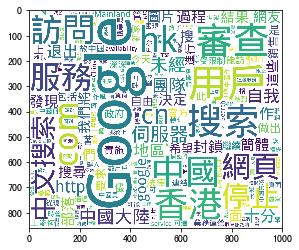

/Users/apple/anaconda3/envs/python3/lib/python3.5/site-packages/wordcloud/wordcloud.py:464: RuntimeWarning: invalid value encountered in double_scalars
  font_size = int(round((rs * (freq / float(last_freq))


google退出中國市場影響2.txt


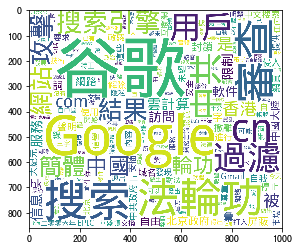

google退出中國市場影響4.txt


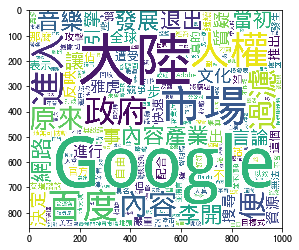

google退出中國市場影響5.txt


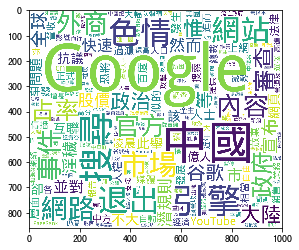

google退出中國市場影響6.txt


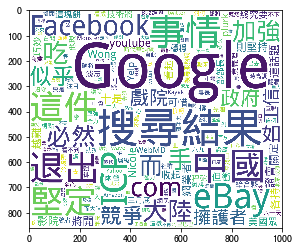

google退出中國市場影響9.txt


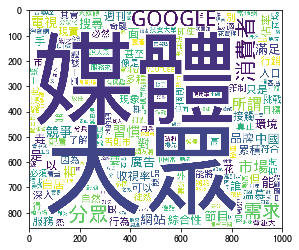

中美貿易戰2018-04-04.txt


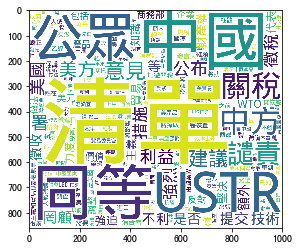

中美貿易戰加稅18-09-2018.txt


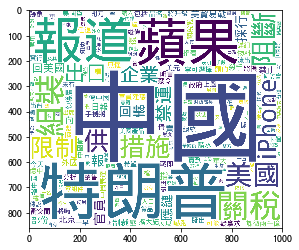

中美貿易戰加稅2018-09-17.txt


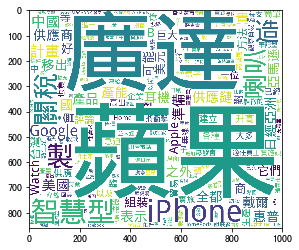

中美貿易戰加稅2018-09-18.txt


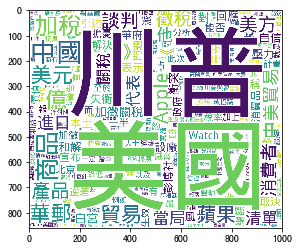

中美貿易戰加稅2018-09-18。.txt


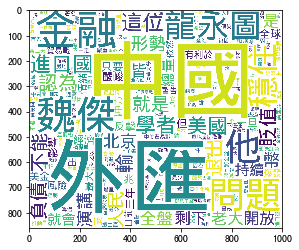

中美貿易戰加稅2018-09-19.txt


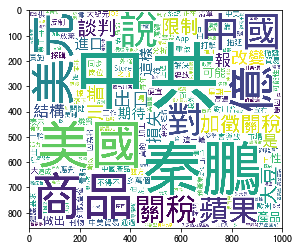

中美貿易戰加稅2018-09-19。.txt


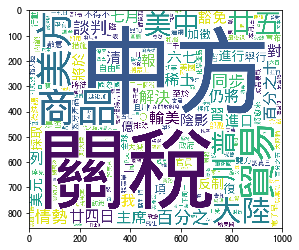

中美貿易戰加稅2018.09.19.txt


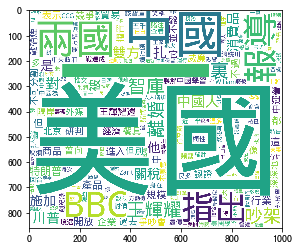

中美貿易戰加稅2018年 9月 18日.txt


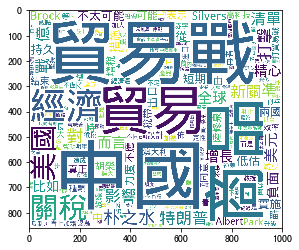

中美貿易戰加稅2018年9月18日.txt


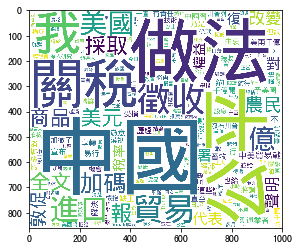

中美貿易戰加稅2018年9月8日.txt


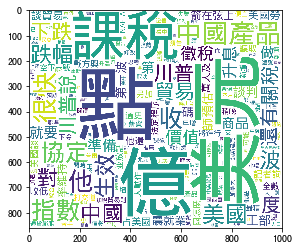

兩岸經濟1.txt


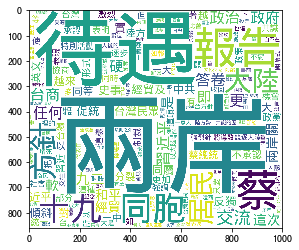

兩岸經濟10.txt


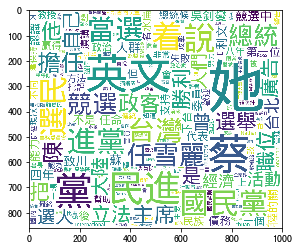

兩岸經濟2.txt


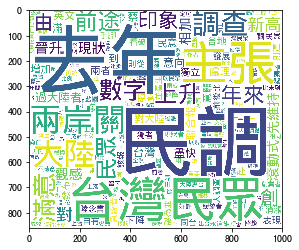

兩岸經濟3.txt


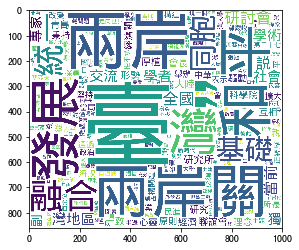

兩岸經濟4.txt


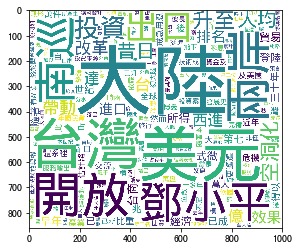

兩岸經濟5.txt


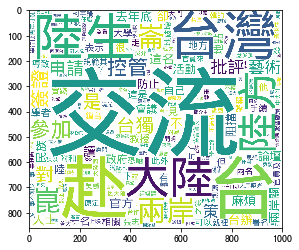

兩岸經濟6.txt


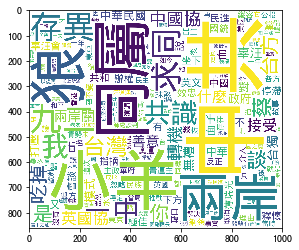

兩岸經濟7.txt


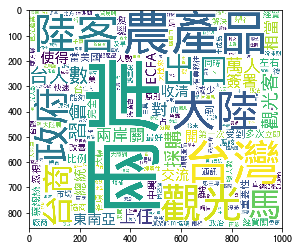

兩岸經濟9.txt


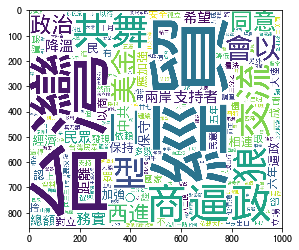

勒索病毒比特幣 2017-05-14.txt


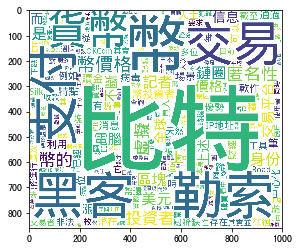

勒索病毒比特幣 2017-05-15.txt


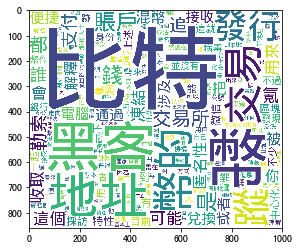

勒索病毒比特幣 2017年05月14日.txt


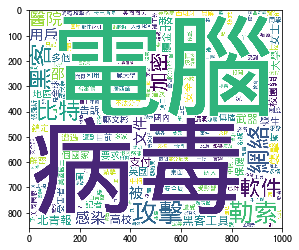

勒索病毒比特幣 2017年5月13日.txt


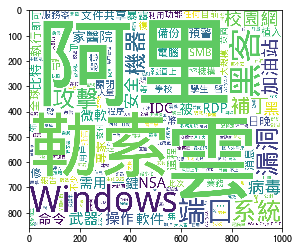

勒索病毒比特幣2017-05-16.txt


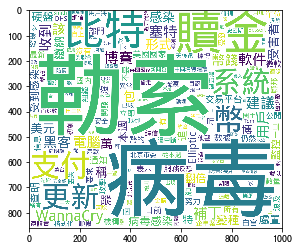

勒索病毒比特幣2017-05-16。.txt


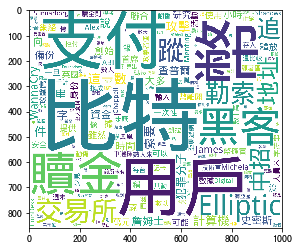

勒索病毒比特幣2017年05月13日.txt


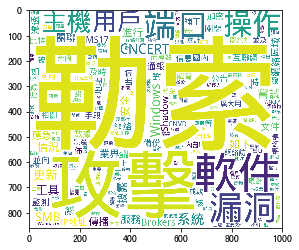

勒索病毒比特幣2017年05月15日.txt


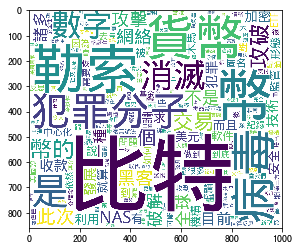

總統大選影響經濟1.txt


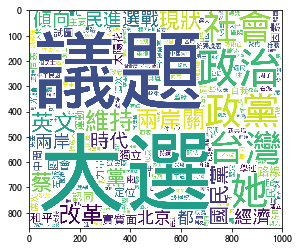

總統大選影響經濟2.txt


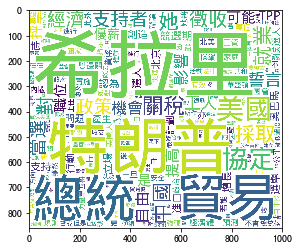

總統大選影響經濟3.txt


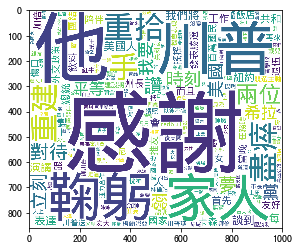

總統大選影響經濟4.txt


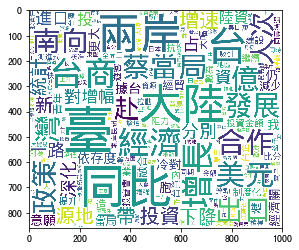

總統大選影響經濟6.txt


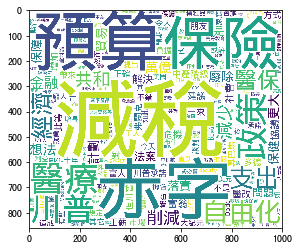

總統大選影響經濟7.txt


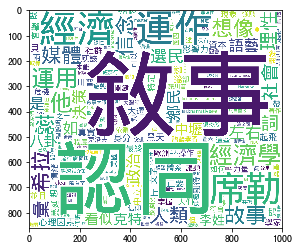

總統大選影響經濟8.txt


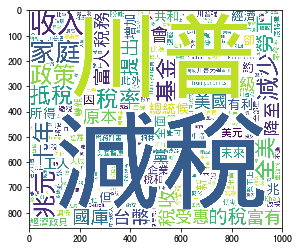

總統大選影響經濟9.txt


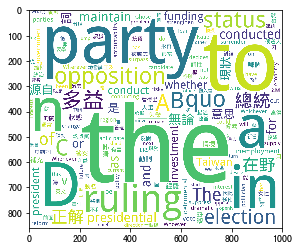

美光機密1 2018-11-10.txt


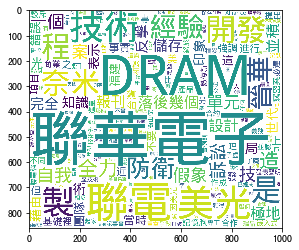

美光洩密 2018 年 11 月 06 日.txt


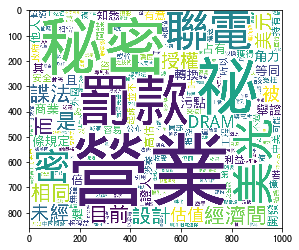

美光洩密 2018年11月10日.txt


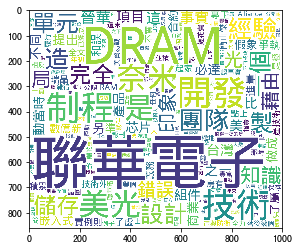

美光洩密.txt


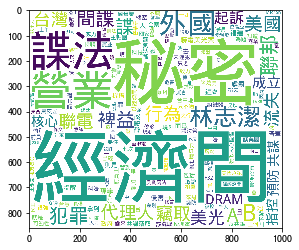

美光洩密2018 年 11 月 03 日.txt


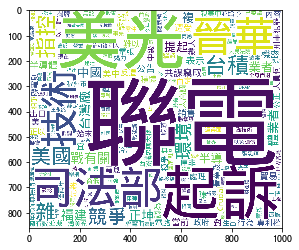

美光洩密2018-11-03.txt


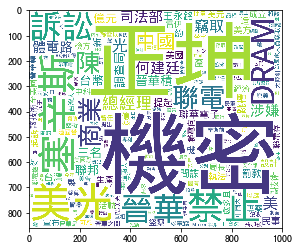

美光洩密2018-11-05.txt


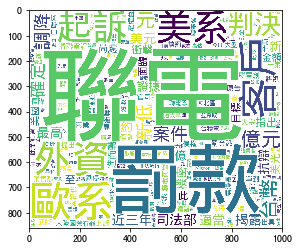

美光洩密2018.11.7.txt


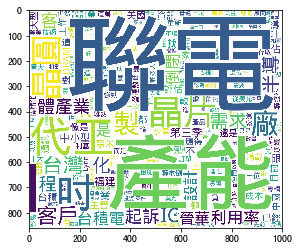

美股大跌經濟影響1.txt


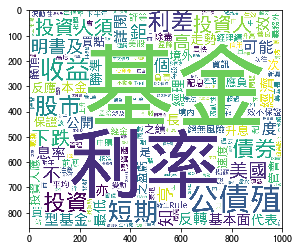

美股大跌經濟影響10.txt


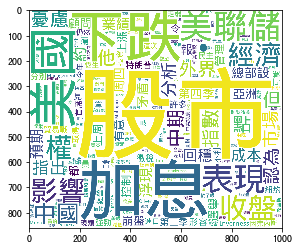

美股大跌經濟影響2.txt


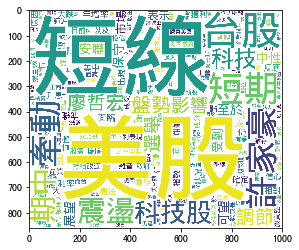

美股大跌經濟影響7.txt


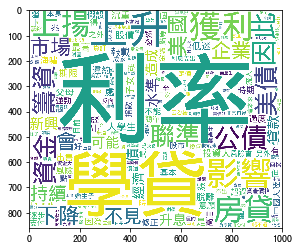

美股大跌經濟影響8.txt


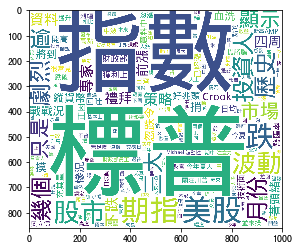

美股大跌經濟影響9.txt


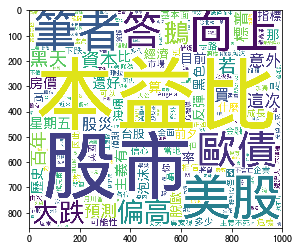

雷曼兄弟破產 2008-09-15.txt


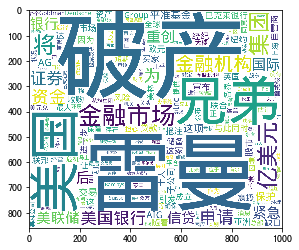

雷曼兄弟破產008年09月16日.txt


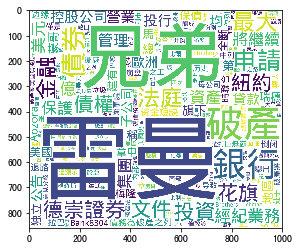

雷曼兄弟破產2008-09-11.txt


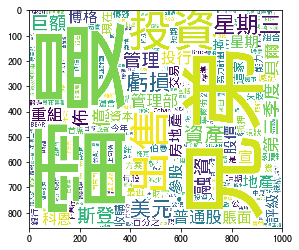

雷曼兄弟破產2008.09.16.txt


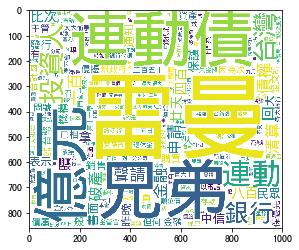

雷曼兄弟破產2008年09月18日。.txt


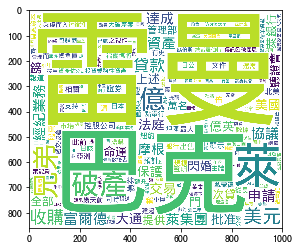

雷曼兄弟破產2008年09月22日.txt


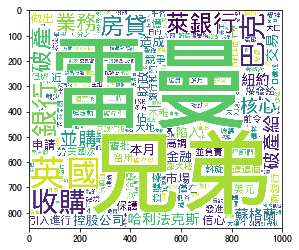

電信詐騙2016-04-15 1-44.txt


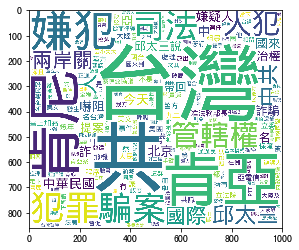

電信詐騙2016-04-16.txt


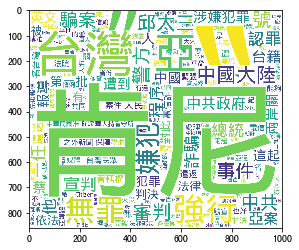

電信詐騙2016418.txt


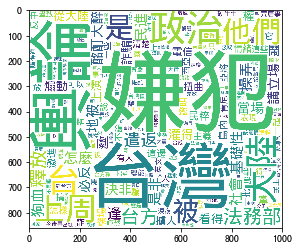

電信詐騙2016年04月13日.txt


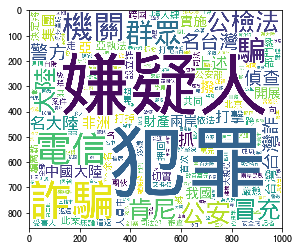

電信詐騙2016年04月14日.txt


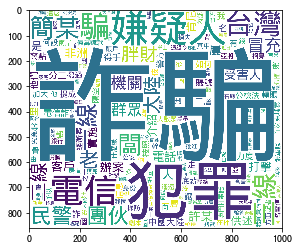

電信詐騙2016年04月14日。.txt


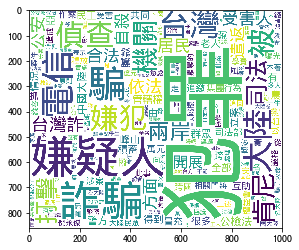

電信詐騙2016年04月15日.txt


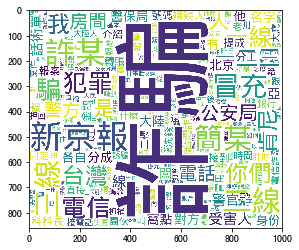

電信詐騙2016年04月20日.txt


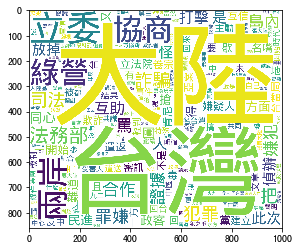

電信詐騙2016年4月14日.txt


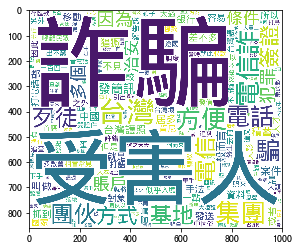

電信詐騙2016年4月18日.txt


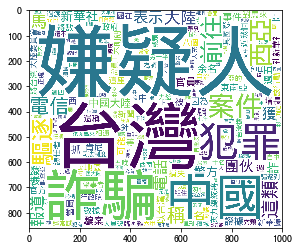

電競產業經濟起飛1.txt


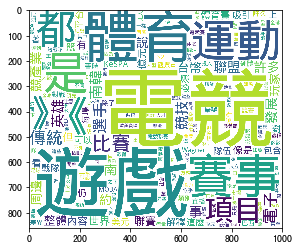

電競產業經濟起飛10.txt


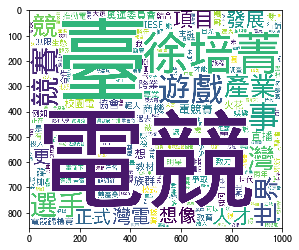

電競產業經濟起飛2.txt


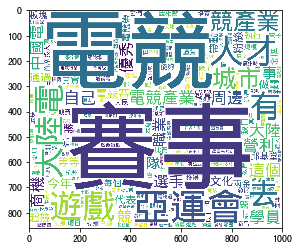

電競產業經濟起飛3.txt


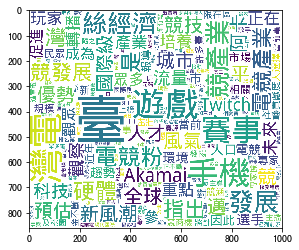

電競產業經濟起飛4.txt


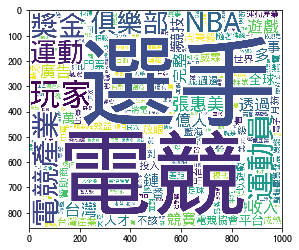

電競產業經濟起飛5.txt


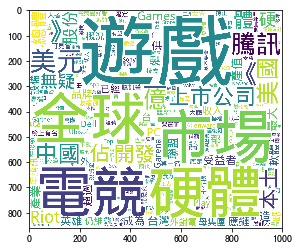

電競產業經濟起飛6.txt


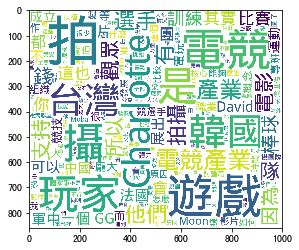

電競產業經濟起飛7.txt


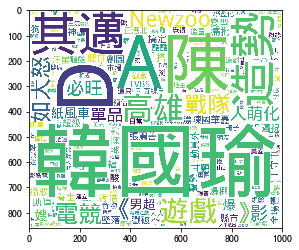

電競產業經濟起飛8.txt


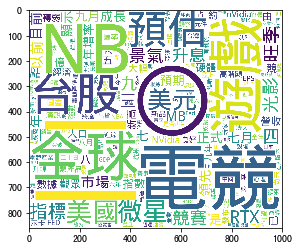

電競產業經濟起飛9.txt


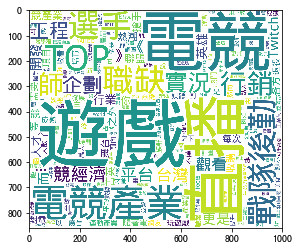

In [161]:
#結果圖呈現
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 
tfidf_dict = df_tfidf.to_dict(orient='records')
remove_list = ['來','如果','顯然','和','就','在','也','了','我們','之','及','。','於','或','與','係','本','為','一','合','公司','民國','年度','月','日','註','其他','年','應','的','六','“','、','『','』','「','」']
for i in range(len(tfidf_dict)):
    #print(i)
    for item in remove_list:
        tfidf_dict[i].pop(item, None)
    wordcloud = WordCloud(font_path = 'wqy-microhei.ttc', background_color="white",width=1000, height=860, margin=2)
    try:
        wordcloud.fit_words(tfidf_dict[i])
        print(file_list[i])
        plt.imshow(wordcloud)
        plt.show()
    except: pass